## PRE PROCESADO DE DATOS ##


In [1]:
from operator import xor
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean


df = pd.read_csv('steam.csv')
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


Este dataset muestra 27075 juegos publicados en steam. Cada fila obviamente pertenece a cada juego en particular . Luego contamos con varias columnas
que permite visualizar ciertas caracteristicas de cada juego publicado en steam

appid : Es un identificador unico  de un juego en steam. Uno de sus usos podria ser para dirigirnos a la pagina de tienda de un juego en particular

Ejemplo : El counter Strike tiene el identificador 10. Supongamos que nos interesa comprar ese juego, deberiamos ir a la pagina de steam y ver toda la informacion de ese juego con la opcion de comprar

https://store.steampowered.com/app/10/  

Name : Nombre del juego
Release Date : Fecha de lanzamiento del juego
English : ¿Si tiene el idioma ingles por defecto?
Developer : Nombre de la empresa que desarrollo el videojuego
platforms : Sistema operativos compatibles con el juego
required_age : ¿edad requerida para que una persona pueda comprar un juego?
categories : permite dar alguna informacion sobre si ese juego es en linea (multiplayer) o no (singleplayer) o ambos
Genero : Como pasa en los libros ,los juegos tambien suelen ser de un genero , como de accion ,terror , plataformas etc
steamspy_tags : Es como una mezcla entre categoria y genero segun podemos analizar. Deberia ser util para encontrar juegos que cumplan con nuestros intereses
achievements: Son logros. Se puede entender como que son desafios que ofrece el juego para  que un usuario pueda realizarlos si quiere. 
Su utilidad esta mas enfocado a lo social ,osea que un Usuario pueda compartir sus logros de un juego con otro y compararse.

positive_ratings: reseñas positivas que dejaron los usuarios que compraron o jugador un juego.
negative_ratings: reseñas negativas
average playtime : Steam tiene un registro del tiempo que cada jugador dedica a cada juego en la plataforma. Esta columna saca el promedio de tiempo de todos los jugadores que jugaron a un juego determinado
owners : Cantidad de jugadores que son propietarios del juego.
price : precio actual del juego en dolares




Comienzo del analisis...

Este dataset es una maravilla para realizar un analisis de datos en mi humilde opinion. Contamos con varias columnas candidatas a ser las variables dependientes. 
Los cuales son 

average_playtime
median_playtime
owners
price

Para el primer analisis vamosa intentar predecir los owners de cada juego segun el resto de columnas salvo ciertas columnas que yo de antemano se que no van aportar nada.

Pero antes de descartar las columnnas vamos a realizar unas pruebas

Existe valores nulos en el DF?

In [2]:
df.isnull().values.any()

False

Por suerte no existe los valores nulos en el dataframe. Eso no garantiza igualmente que el dato Nulo este representado de otra forma.

Pero antes de seguir profundizando con esto veo que a simple vista que en todos los juegos ,la columna english tiene como valor 1.
Si es  asi English es la primera columna candidata a ser eliminada.

In [3]:
(df['english'] == 1).all()

False

Dio falso. Entonces existe juegos en donde la columna english es diferente a 1. Comprobemoslo

In [4]:
df.loc[df['english'] != 1]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1297,207370,eXceed - Gun Bullet Children,2012-08-02,0,Flat Software,Nyu Media,windows,0,Single-player;Steam Trading Cards,Action;Indie,Bullet Hell;Anime;Shoot 'Em Up,0,204,215,97,108,50000-100000,1.99
2221,262300,Tsukumogami,2012-05-31,0,TORaIKI,Fruitbat Factory,windows,0,Single-player,Adventure;Indie;RPG,RPG;Indie;Adventure,49,33,17,0,0,50000-100000,22.99
3001,292990,NOBUNAGA'S AMBITION: Souzou (Traditional Chine...,2014-08-01,0,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Single-player;Steam Cloud,Strategy,Strategy;Historical,0,413,74,0,0,20000-50000,17.99
3085,295950,新流星搜劍錄,2017-12-20,0,Titans,Titans,windows,18,Multi-player;Online Multi-Player;MMO,Violent;Action;Adventure;Indie;Massively Multi...,Action;RPG;Fighting,0,664,323,0,0,0-20000,15.49
3745,318300,Phineas and Ferb: New Inventions,2015-02-24,0,PIPE Studio,Disney Interactive,windows,0,Single-player,Adventure,Adventure;Psychological Horror;Sexual Content,0,5,7,0,0,0-20000,15.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27021,1056010,Не падай!,2019-04-17,0,SharF Co.,SharF Co.,windows,0,Single-player;Steam Achievements,Casual;Indie;Racing;Simulation,Casual;Indie;Simulation,3,1,1,0,0,0-20000,1.69
27024,1056500,VRLife,2019-04-11,0,"Wuhan Mandrill VR Co., Ltd.","Wuhan Mandrill VR Co., Ltd.",windows,0,Online Multi-Player;MMO,Casual;Free to Play;Massively Multiplayer;RPG;...,Early Access;Free to Play;Massively Multiplayer,0,16,3,0,0,0-20000,0.00
27026,1056710,VTB Basketball League VR,2019-04-12,0,Axyos Games,LikeVR,windows,0,Single-player,Casual;Free to Play;Sports,Free to Play;Casual;Sports,0,3,0,0,0,0-20000,0.00
27036,1058000,Rain's love memory-雨的恋记,2019-04-19,0,the original air,the original air,windows,0,Single-player,Free to Play,Free to Play;Visual Novel,0,33,2,0,0,0-20000,0.00


Antes de continuar , voy a verificar algo. <br>
<br>
¿sera que la columna  solo almacenas 1 y 0? ¿Sera una forma  de  representar los  booleanos?

In [5]:
valores_unicos = df['english'].unique()
valores_unicos

array([1, 0], dtype=int64)

Efectivamente es asi, la columna english solo almacena 0 y 1. Ahora volvamos analizar a los juegos con el campos english = 0

In [6]:
df.loc[df['english'] == 0]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1297,207370,eXceed - Gun Bullet Children,2012-08-02,0,Flat Software,Nyu Media,windows,0,Single-player;Steam Trading Cards,Action;Indie,Bullet Hell;Anime;Shoot 'Em Up,0,204,215,97,108,50000-100000,1.99
2221,262300,Tsukumogami,2012-05-31,0,TORaIKI,Fruitbat Factory,windows,0,Single-player,Adventure;Indie;RPG,RPG;Indie;Adventure,49,33,17,0,0,50000-100000,22.99
3001,292990,NOBUNAGA'S AMBITION: Souzou (Traditional Chine...,2014-08-01,0,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Single-player;Steam Cloud,Strategy,Strategy;Historical,0,413,74,0,0,20000-50000,17.99
3085,295950,新流星搜劍錄,2017-12-20,0,Titans,Titans,windows,18,Multi-player;Online Multi-Player;MMO,Violent;Action;Adventure;Indie;Massively Multi...,Action;RPG;Fighting,0,664,323,0,0,0-20000,15.49
3745,318300,Phineas and Ferb: New Inventions,2015-02-24,0,PIPE Studio,Disney Interactive,windows,0,Single-player,Adventure,Adventure;Psychological Horror;Sexual Content,0,5,7,0,0,0-20000,15.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27021,1056010,Не падай!,2019-04-17,0,SharF Co.,SharF Co.,windows,0,Single-player;Steam Achievements,Casual;Indie;Racing;Simulation,Casual;Indie;Simulation,3,1,1,0,0,0-20000,1.69
27024,1056500,VRLife,2019-04-11,0,"Wuhan Mandrill VR Co., Ltd.","Wuhan Mandrill VR Co., Ltd.",windows,0,Online Multi-Player;MMO,Casual;Free to Play;Massively Multiplayer;RPG;...,Early Access;Free to Play;Massively Multiplayer,0,16,3,0,0,0-20000,0.00
27026,1056710,VTB Basketball League VR,2019-04-12,0,Axyos Games,LikeVR,windows,0,Single-player,Casual;Free to Play;Sports,Free to Play;Casual;Sports,0,3,0,0,0,0-20000,0.00
27036,1058000,Rain's love memory-雨的恋记,2019-04-19,0,the original air,the original air,windows,0,Single-player,Free to Play,Free to Play;Visual Novel,0,33,2,0,0,0-20000,0.00


el primer caso es eXceed - Gun Bullet Children. Tiene su appid 207370 asi que lo buscamos en la pagina de steam <br>

https://store.steampowered.com/app/207370/  

Efectivamente el juego no esta en ingles. Y al no estar en ingles puede ser determinante para que menos usuarios sean owners del juego en particular. Por lo que la columna english no se va a eliminar por ahora ya que a simple vista puede ser relevante para la prediccion. Sin embargo al entrar a la tienda del juego en steam vi que el numero de reseñas positivas del dataset no coincidian con las mostradas en la paginas... Antes de continuar veamos el juego

In [7]:

juegodeXceed = df.loc[df['appid'] ==207370, ['appid','name','english','genres', 'positive_ratings'	,'negative_ratings']]
juegodeXceed

,appid,name,english,genres,positive_ratings,negative_ratings
1297,207370,eXceed - Gun Bullet Children,0,Action;Indie,204,215


El juego eXceed - Gun Bullet Children que no esta en ingles cuenta con 204 reseñas positivas y 215 negativas en el dataset. En steam el numero es 227 y 261 respectivamente lo que ahora surge la duda (que en realidad no aporta nada a la prediccion) de que tan desactualizdo esta el dataset. Asi que veamos cual es el juego mas recientemente publicado en steam segun el dataset

In [8]:
fila_mas_reciente = df.loc[df['release_date'] == df['release_date'].max()]
fila_mas_reciente

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
23726,905370,Conqueror's Blade,2019-05-01,1,Booming Games,My.com,windows,0,Online Multi-Player;MMO;Online Co-op;In-App Pu...,Action;Free to Play;Massively Multiplayer;RPG;...,Action;Strategy;RPG,0,259,235,0,0,0-20000,11.39


Con esto podriamos concluir que la ultima actualizacion del data set o la fecha misma de la creacion podria ser del 2019-05-01. Por lo que no vamos a encontrar en este dataset juego lanzados en 2023.

Entonces volviendo a lo que importa... La columna english no va a ser eliminada. <br>
Le toca a la columna required_age. Veamos que datos suele almacenar

In [9]:
df.loc[:,'required_age'].unique()

array([ 0, 18, 16, 12,  7,  3], dtype=int64)

Concluimos que existen juegos para personas de 18 años , otros para 16,12,7 y 3 inclusive. Esto podria ser determinante para la cantidad de owners que posee un juego, ya que en teoria se supone que esto excluye a ciertos jugadores que no cumple con la edad para jugar a un juego teoria. En la practica no suele ser tan asi ya que muchisimos menores de 18 años suelen jugar juegos para adultos. Aun asi existe la posibilidad de que algunos padres no dejen jugar a sus hijos a un juego si este determina que es un juego para adultos y jugador en cuestion no cuenta con  la edad suficiente.

Ahora como vemos arriba algunos juegos tienen 0 en la columna required_age ¿Que significado tiene esto? ¿Querra decir que incluso un recien nacido es apto para jugar el juego? ¿Lo que suena absurdo no? ¿O quizas querra decir que no se definio una edad , osea que es un null? <br>
Verifiquemoslo. Primero veamos cuantos juegos tenemos

In [10]:
num_filas = len(df)
num_filas

27075

ahora veamos cuantos juegos en la columna required_age tienen asignado el 0 como dato

In [11]:
len(df.loc[df['required_age'] == 0])

26479

Contamos con 26479 juegos que tienen almacenado 0 en la columna required_age.


In [12]:
porcentaje= (26479*100)/27075
porcentaje

97.79870729455217

¿Qué significa que el 98% de los juegos no pida ningún tipo de requisito de edad? ¿Es posible que los datos de required_age no se hayan almacenado correctamente y se interpreten los valores 0 como nulos? Verificar esto último es una tarea complicada, ya que requeriría buscar cada juego con required_age = 0 en la tienda de Steam y comprobar si realmente requiere una edad mínima para acceder. Si encontramos un solo juego con required_age = 0 que requiera una edad mínima en la aplicación web de Steam, concluiríamos que el valor 0 representa un valor nulo. En resumen, podemos asumir que el 98% de los juegos de Steam no requieren una edad mínima para acceder, aunque es posible que haya casos en los que la información de required_age no esté bien almacenada.

Para verificar que es cierto que los juegos de 18 años piden una edad minima (18 años por supuesto) hacemos una busqueda en el dataset primero

In [13]:
df.loc[df['required_age'] == 18]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
46,2210,Quake IV,2011-08-04,1,RavenSoft / id Software,Bethesda Softworks,windows,18,Single-player;Multi-player;Steam Cloud,Action,FPS;Action;Shooter,0,891,171,36,32,200000-500000,12.99
132,4560,Company of Heroes - Legacy Edition,2007-07-17,1,Relic Entertainment,SEGA,windows,18,Single-player;Multi-player;Steam Trading Cards...,Violent;Action;Strategy,Strategy;RTS;World War II,0,4772,320,175,186,2000000-5000000,0.00
136,4720,Condemned: Criminal Origins,2012-10-29,1,Monolith,SEGA,windows,18,Single-player,Action,Horror;Action;Atmospheric,0,1243,221,312,312,200000-500000,9.99
173,6860,Hitman: Blood Money,2007-03-15,1,Io-Interactive A/S,Io-Interactive A/S,windows,18,Single-player,Action,Stealth;Action;Third Person,0,5864,391,435,365,1000000-2000000,9.29
176,6900,Hitman: Codename 47,2007-03-15,1,IO Interactive A/S,IO Interactive A/S,windows,18,Single-player,Action,Stealth;Action;Classic,0,1186,450,62,43,1000000-2000000,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26325,1013180,Funbag Fantasy,2019-01-31,1,Waffle,MangaGamer,windows,18,Single-player;Steam Cloud,Adventure,Sexual Content;Nudity;Adventure,0,21,0,0,0,0-20000,31.99
26372,1014730,Cyndy,2019-01-31,1,DreamBig Games,DreamBig Games,windows,18,Single-player,Simulation;Early Access,Early Access;Nudity;Sexual Content,21,16,6,0,0,0-20000,2.99
26444,1018810,Drumpfy Walls,2019-04-19,1,Hotbox Garage,Hotbox Garage,windows,18,Single-player;Steam Achievements;Partial Contr...,Action;Casual;Indie;Sports,Action;Indie;Casual,5,3,0,0,0,0-20000,3.99
26499,1021860,Unravel Cyndy,2019-02-10,1,DreamBig Games,DreamBig Games,windows,18,Single-player,Indie,Nudity;Sexual Content;Indie,19,2,0,0,0,0-20000,1.69


tomemos al primer juego. Quake 4 (Juego que curiosamente cuenta con una de las escena mas violenta de la historia de los videojuegos).
<br>
https://store.steampowered.com/app/2210/  


Como podemos ver ese juego nos pide que ingresemos nuestra edad...

En fin todo este analisis previo de datos se hizo con la intencion de profundizar un poco en el data set y ver la posibilidad de eliminar alguna columna de entrada . Al final no se elimino ninguna  ya que concluimos que no existen datos nulos camuflados en el 0 de las 2 columnas analizadas, aun asi  no se descarta eliminarlas junto otras nuevas   posteriomente de manera algoritmica.


Ahora se va intentar predecir el owner segun ciertas variables independientes pero el owner no es un dato numerico sino que intuyo que es categorico (Tiene un guion que representa un rango)


In [14]:
soloOwner = df.loc[:,['owners']]
soloOwner

,owners
0,10000000-20000000
1,5000000-10000000
2,5000000-10000000
3,5000000-10000000
4,5000000-10000000
...,...
27070,0-20000
27071,0-20000
27072,0-20000
27073,0-20000


Lo que se va hacer ahora es convertir todos los datos de "categorico" a numerico .Para eso vamos a splitear cada  dato usando el guion como delimitador y luego los 2 valores numericos resultantes del corte se van a sumar y dividir por 2 para asi sacar un promedio y que ese promedio represente el la cantidad de owners que se hicieron con el juego.  Se crea una funcion para realizar esta tarea


In [15]:
def ownersPromedio(owner):
    nums = owner.split('-')
    num1 = int(nums[0])
    num2 = int(nums[1])
    return (num1 + num2) / 2

Ya tenemos la funcion. Ahora queremos aplicar la funcion a cada valor de la columna owner


In [16]:
df['ownersPromedio'] = df['owners'].apply(ownersPromedio)

visualizamos como va quedando la cosa

In [17]:
soloOwner = df.loc[:,['name','owners','ownersPromedio']]
soloOwner

,name,owners,ownersPromedio
0,Counter-Strike,10000000-20000000,15000000.0
1,Team Fortress Classic,5000000-10000000,7500000.0
2,Day of Defeat,5000000-10000000,7500000.0
3,Deathmatch Classic,5000000-10000000,7500000.0
4,Half-Life: Opposing Force,5000000-10000000,7500000.0
...,...,...,...
27070,Room of Pandora,0-20000,10000.0
27071,Cyber Gun,0-20000,10000.0
27072,Super Star Blast,0-20000,10000.0
27073,New Yankee 7: Deer Hunters,0-20000,10000.0


Ahora se procede a eliminar la columna owners original

In [18]:
df = df.drop(columns=['owners'])

por ultimo la renombramos la columna ownersPromedio a owners

In [19]:
df = df.rename(columns={'ownersPromedio': 'owner'})

Listo . Visualicemos ahora el dataframe completo

In [20]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owner
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,15000000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,7500000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,7500000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,7500000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,7500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,2.09,10000.0
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,1.69,10000.0
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,3.99,10000.0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,5.19,10000.0


## Separacion de variables dependientes de las independientes ##
Primero establecemos la variables independiente<br>
Probablemente la columna appid va a ser candidata a ser eliminado mas adelante

In [21]:
X= df.iloc[:, 0:17]
X

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,5.19


ahora separamos la variable dependiente que es la que buscamos predecir

In [22]:
Y= df.loc[:,['owner']]
Y

,owner
0,15000000.0
1,7500000.0
2,7500000.0
3,7500000.0
4,7500000.0
...,...
27070,10000.0
27071,10000.0
27072,10000.0
27073,10000.0


Ya contamos con las variables dependientes e independientes separados y almacenados en una variable. El siguiente paso es es convertir aquellos datos categoricos de l a numericos.
Para eso veamos que columnas no son numericas segun pandas.


In [23]:
columnasNoNumericas = X.select_dtypes(exclude=['number'])
columnasNoNumericas = columnasNoNumericas.columns.tolist()
columnasNoNumericas


['name',
 'release_date',
 'developer',
 'publisher',
 'platforms',
 'categories',
 'genres',
 'steamspy_tags']

Efectivamente esas columnas perteneciente al dataset que contiene las variables independiente no almacenan datos numericos sino que en alguno casos pueden ser fechas o string.. ets. Procedemos a realizar la conversion de
los datos categoricos a numericos


In [24]:
from sklearn.preprocessing import LabelEncoder
'''
Utilizamos LabelEnconder para convertir a números los datos categóricos.
'''
labelencoder_X = LabelEncoder()



Antes de la conversion tenemos que tener en cuenta que LabelEncoder hace su "codificacion" por una columna a la vez asi que una opcion seria armar  un bucle dentro de una funcion sino  otra alternativa es hacer uso de las Lamndas . Para este caso se va ir por la ultima opcion mencionada

In [25]:
X[columnasNoNumericas]=X[columnasNoNumericas].apply(lambda col: labelencoder_X.fit_transform(col))
X

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,10,4799,4,1,15118,12625,6,0,329,2,209,0,124534,3339,17612,317,7.19
1,20,21902,2,1,15118,12625,6,0,329,2,209,0,3318,633,277,62,3.99
2,30,5635,9,1,15118,12625,6,0,497,2,2532,0,3416,398,187,34,3.99
3,40,5823,6,1,15118,12625,6,0,329,2,209,0,1273,267,258,184,3.99
4,50,10042,3,1,5659,12625,6,0,2488,2,2503,0,5250,288,624,415,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,18429,2615,1,12182,10209,3,0,2855,521,958,7,3,0,0,0,2.09
27071,1065570,5200,2614,1,12503,1374,3,0,623,145,291,0,8,1,0,0,1.69
27072,1065650,21337,2615,1,4494,3752,3,0,1239,264,299,24,0,1,0,0,3.99
27073,1066700,15056,2608,1,16007,557,5,0,3209,521,3319,0,2,0,0,0,5.19


Como vimos ahi arriba ,todas las columnas que antes era categoricos ahora guardan datos numericos y aquellos que eran ya por defecto numericos permanecen igual.

## Dividir el dataset en conjunto de entrenamiento y conjunto de test ##

Para empezar usaremos el 80% de los conjuntos de datos para el entrenamiento y el 20 restante para el testeo

In [26]:
from sklearn.model_selection import train_test_split
'''
train_test_split permite dividir un dataset en bloques, típicamente bloques 
destinados al entrenamiento y validación del modelo.
'''
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [27]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.coef_.shape)

(1, 17)


Mostramos el conjunto de entrenamiento de forma ordenada (Solo para visualizar , el X_train desordenado es el que se va usar para la prediccion)

In [28]:
X_trainOrdenado = X_train.sort_values(by='appid')
X_trainOrdenado




,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,10,4799,4,1,15118,12625,6,0,329,2,209,0,124534,3339,17612,317,7.19
1,20,21902,2,1,15118,12625,6,0,329,2,209,0,3318,633,277,62,3.99
2,30,5635,9,1,15118,12625,6,0,497,2,2532,0,3416,398,187,34,3.99
3,40,5823,6,1,15118,12625,6,0,329,2,209,0,1273,267,258,184,3.99
5,60,18080,4,1,15118,12625,6,0,456,2,209,0,2758,684,175,10,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27069,1065160,5817,2614,1,876,11696,3,0,2855,974,3495,1,2,2,0,0,2.09
27070,1065230,18429,2615,1,12182,10209,3,0,2855,521,958,7,3,0,0,0,2.09
27071,1065570,5200,2614,1,12503,1374,3,0,623,145,291,0,8,1,0,0,1.69
27072,1065650,21337,2615,1,4494,3752,3,0,1239,264,299,24,0,1,0,0,3.99


Como dato curioso el juego con el id mas pequeño ,osea el Counter strike se encuentra en el conjunto de entrenamiento.

In [29]:
df.loc[df['appid'] == 10]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owner
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,15000000.0


y ademas podemos ver que el developer VALVE numericamente es  15118 segun la conversion realizada. Ahora procedamosa ver el resto del conjunto

In [30]:
X_test

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
151,6040,22350,248,1,8351,6987,5,0,3209,494,1111,0,575,55,801,801,4.79
16974,703530,9632,2025,1,11854,9944,3,0,2855,264,299,1,14,13,0,0,4.99
11436,541720,17828,1719,1,792,728,5,0,3052,521,3319,9,19,15,0,0,4.99
16469,688780,21880,1997,1,13890,11608,3,0,623,1433,257,0,2,0,0,0,1.59
759,40100,21396,346,1,5643,11058,3,0,2414,1304,5903,47,5336,903,1834,2894,8.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,39200,6969,20,1,5643,11058,3,0,623,1127,4506,0,813,343,754,1502,4.99
24436,931930,22570,2418,1,6425,5421,3,0,623,495,859,0,32,2,0,0,4.79
10046,502810,21839,1665,1,4302,3597,3,0,623,1006,5339,10,11,8,0,0,2.09
19702,781610,15111,2161,1,337,7534,3,0,2855,605,1001,4,10,16,4,4,0.79


In [31]:
y_train

,owner
9267,10000.0
19313,10000.0
26925,10000.0
121,15000000.0
2092,35000.0
...,...
13123,35000.0
19648,35000.0
9845,10000.0
10799,10000.0


In [32]:
y_test

,owner
151,150000.0
16974,10000.0
11436,10000.0
16469,10000.0
759,1500000.0
...,...
743,750000.0
24436,10000.0
10046,10000.0
19702,10000.0


## Escalado de los datos


Veamos por ejemplo el conjunto de entrenamiento que pertenece a las variables independientes

In [33]:
X_train

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
9267,477720,23782,1800,1,1190,1058,3,0,3109,89,3126,66,7,6,0,0,10.99
19313,771100,21807,2157,1,8122,8070,6,0,2855,834,5118,10,6,2,0,0,1.69
26925,1048040,7784,2597,1,15161,12664,3,0,623,6,2598,0,14,7,0,0,0.00
121,4000,9168,51,1,4759,12625,6,0,1140,1024,4936,29,363721,16433,12422,1875,6.99
2092,256030,19339,1159,1,5586,6322,3,0,3025,1000,4533,18,227,135,0,0,29.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,586750,20138,1888,1,7800,970,5,0,3116,1009,4698,20,140,91,0,0,3.99
19648,780120,3721,2168,1,5095,4252,3,0,47,728,2835,0,9,15,37,37,0.00
9845,497510,5064,1751,1,5512,4614,5,0,2855,489,5605,12,11,1,0,0,3.99
10799,522950,13720,2065,1,10019,8382,3,0,2331,1489,2021,0,6,0,0,0,4.79


Si analizamos el dataset vemos que muchas columnas no se encuentra dentro de un mismo rango de valores sino todo lo contrario ,se nota una clara diferencia de escalas entre varias caracteristicas (columnas del dataset) y lo que no se quiere es que alguna de ellas tengan cierto dominio sobre otras por tener un rango grande ,sino que lo que se desea realmente es que dominen unas sobre otras  porque realmente aportan   en el proceso de prediccion <br>

Podemos ver una diferencia grande de escalas   por ejemplo con la columna developer y achievements o en el caso mas extremo entre appid y english.

No escalarar este dataset puede afectar negativamente el rendimiento del algoritmos de aprendizaje automático, ya que las columnas con valores más grandes podrían tener un peso desproporcionado en la predicción.
De hecho vamos a demostrar que esto es cierto asi que antes de continuar con la prediccion vamos a guardar el conjunto de entrenamiento y de testeo en unas variables extras antes de que el conjunto sea escalado para mas adelante realizar una comparacion



In [34]:
X_train_noEscalado, X_test_noEscalado, y_train_noEscalado, y_test_noEscalado = X_train, X_test, y_train, y_test

Antes de realizar el escalado ,hay una columna que no lo requiere. Esa es la columna english que fue una de las primera analizadas. Recordemos que esta columna solo
guarda 1 y 0 por lo que un escalado no deberia ser necesario

In [35]:


listaDeColumnas = X_train.columns.tolist()
listaDeColumnas.remove('english')
listaDeColumnas





['appid',
 'name',
 'release_date',
 'developer',
 'publisher',
 'platforms',
 'required_age',
 'categories',
 'genres',
 'steamspy_tags',
 'achievements',
 'positive_ratings',
 'negative_ratings',
 'average_playtime',
 'median_playtime',
 'price']

Esta nueva lista de columnas va aser util para indicar cuales son las columnas que requieren el escalado. Al no esta english ya que lo borramos de la lista no deberia escalarse sobre esa columna.

In [36]:
X_train

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
9267,477720,23782,1800,1,1190,1058,3,0,3109,89,3126,66,7,6,0,0,10.99
19313,771100,21807,2157,1,8122,8070,6,0,2855,834,5118,10,6,2,0,0,1.69
26925,1048040,7784,2597,1,15161,12664,3,0,623,6,2598,0,14,7,0,0,0.00
121,4000,9168,51,1,4759,12625,6,0,1140,1024,4936,29,363721,16433,12422,1875,6.99
2092,256030,19339,1159,1,5586,6322,3,0,3025,1000,4533,18,227,135,0,0,29.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,586750,20138,1888,1,7800,970,5,0,3116,1009,4698,20,140,91,0,0,3.99
19648,780120,3721,2168,1,5095,4252,3,0,47,728,2835,0,9,15,37,37,0.00
9845,497510,5064,1751,1,5512,4614,5,0,2855,489,5605,12,11,1,0,0,3.99
10799,522950,13720,2065,1,10019,8382,3,0,2331,1489,2021,0,6,0,0,0,4.79


In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[listaDeColumnas] = sc_X.fit_transform(X_train[listaDeColumnas])
X_test[listaDeColumnas] = sc_X.transform(X_test[listaDeColumnas])

X_train


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
9267,-0.465410,1.314405,-0.098336,1,-1.475693,-1.414082,-0.657417,-0.150740,0.986261,-1.347167,0.327929,0.057637,-0.050623,-0.045663,-0.079065,-0.059992,0.595868
19313,0.702484,1.061306,0.532372,1,-0.080354,0.251222,1.831017,-0.150740,0.756944,0.646643,1.420231,-0.100225,-0.050672,-0.046524,-0.079065,-0.059992,-0.540520
26925,1.804933,-0.735763,1.309714,1,1.336523,1.342267,-0.657417,-0.150740,-1.258159,-1.569297,0.038403,-0.128415,-0.050275,-0.045447,-0.079065,-0.059992,-0.747024
121,-2.351206,-0.558402,-3.188273,1,-0.757291,1.333005,1.831017,-0.150740,-0.791399,1.155132,1.320432,-0.046665,17.984932,3.492044,6.140056,0.659130,0.107099
2092,-1.347919,0.745028,-1.230783,1,-0.590824,-0.163917,-0.657417,-0.150740,0.910424,1.090902,1.099449,-0.077674,-0.039713,-0.017881,-0.079065,-0.059992,2.917520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-0.031381,0.847421,0.057133,1,-0.145169,-1.434981,1.001539,-0.150740,0.992581,1.114988,1.189926,-0.072036,-0.044027,-0.027357,-0.079065,-0.059992,-0.259478
19648,0.738391,-1.256443,0.551805,1,-0.689658,-0.655528,-0.657417,-0.150740,-1.778185,0.362960,0.168361,-0.128415,-0.050523,-0.043724,-0.060541,-0.045801,-0.747024
9845,-0.386630,-1.084336,-0.184903,1,-0.605720,-0.569555,1.001539,-0.150740,0.756944,-0.276665,1.687274,-0.094587,-0.050424,-0.046739,-0.079065,-0.059992,-0.259478
10799,-0.285357,0.024944,0.369836,1,0.301492,0.325320,-0.657417,-0.150740,0.283864,2.399591,-0.277992,-0.128415,-0.050672,-0.046955,-0.079065,-0.059992,-0.161724


Finalmente logramos el escalado que buscabamos con el conjunto de entramiento y testeo perteneciente al dataset que contempla las variables independientes 

#### Entrenamiento

Ahora vamos a entrenar nuestro modelo

In [38]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
dfAux = df.copy()
dfAux = dfAux.drop(['owner'], axis=1)
dfAux = dfAux.T
dfAux = dfAux.index

coeficientes = np.ravel(regressor.coef_) #Por alguna razon es un arreglo dentro de otro arreglo. Necesito que esto este aplanado sino me da error mas adelante


Para el caso de la regresión lineal multivariable, el modelo de regresión debe  encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes han sido seleccionado por  nuestro modelo de regresión, ejecutamos el siguiente código:

In [40]:
coeff_df = pd.DataFrame(coeficientes, dfAux, columns=['Coefficient']) 
coeff_df

,Coefficient
appid,17754.569880
name,9030.227280
release_date,-125710.310676
english,-25214.447071
developer,-1094.482147
publisher,9498.073784
platforms,27006.379986
required_age,42830.022140
categories,-25549.030606
genres,-42690.073453


Todos impactan de alguna manera ,ya sea positivamente o negativamente en la cantidad de owners finales. Es por eso que tendremos que realizar una eliminacion mas adelante .Aun asi procedamos. Veamos cuales son las variables que mas impactan. Empezemos con el que mayor impacto tiene positivamente

In [41]:
coeficienteQueMasImpactaPositivamente = coeff_df.loc[coeff_df['Coefficient'].idxmax()]
coeficienteQueMasImpactaPositivamente

Coefficient    512812.198467
Name: negative_ratings, dtype: float64

Ahora vamos por el que mayor impacto negativo tiene

In [42]:
coeficienteQueMasImpactaNegativamente = coeff_df.loc[coeff_df['Coefficient'].idxmin()]
coeficienteQueMasImpactaNegativamente

Coefficient   -172622.341749
Name: median_playtime, dtype: float64

Como conclusion el que mayor impacto tiene es la columna negative_ratings que lo hace positivamente seguido de median_playtime que lo hace negativamente

#### Predicción sobre los datos de la prueba

In [43]:
y_pred = regressor.predict(X_test).flatten()
y_pred

array([432289.57404755,  14279.91201878, 124978.13770813, ...,
       136517.27730614, -29924.66120401, -97426.63167074])

# Resultados de la prediccion <br>
## Datos sobre columnas adicionales
* Diferencia = la diferencia numerica entre el dato real y su prediccion <br>
* Diferencia porcentual % = La diferencia entre el dato real y su prediccion  en terminos porcentuales<br>
* Eficacia de prediccion% = indica el porcentaje de acierto que hay entre la prediccion y el dato real. En esta columna cuanto mayor es el numero mejor<br>
* Error porcentual de prediccion% = indica porcentualmente que tan lejos se estubo de acertar la prediccion. En esta columna cuanto MENOR es el numero mejor

In [44]:
y_test = np.ravel(y_test) ##EVITA ERRORES. 
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) ##PARA EVITAR LA NOTACION CIENTIFICA
dff = pd.DataFrame({'Actual': y_test, 'Prediccion':y_pred})


diferencia = abs(dff['Prediccion']-dff['Actual'])
diferenciaPorcentual=abs(((dff['Prediccion']*100)/(dff['Actual']))-100)
eficaciaDePrediccion = np.where(diferenciaPorcentual <= 100 , 100-diferenciaPorcentual , 100/diferenciaPorcentual)
errorDePrediccion = 100-eficaciaDePrediccion

dff = pd.DataFrame({'Actual': y_test, 'Prediccion':y_pred,"Diferencia": diferencia,"Diferencia porcentual %":diferenciaPorcentual,"Eficacia de prediccion %":eficaciaDePrediccion,"Error porcentual  de prediccion %":errorDePrediccion})


df1 = dff.head(20)
df1


,Actual,Prediccion,Diferencia,Diferencia porcentual %,Eficacia de prediccion %,Error porcentual de prediccion %
0,150000.00,432289.57,282289.57,188.19,0.53,99.47
1,10000.00,14279.91,4279.91,42.80,57.20,42.80
2,10000.00,124978.14,114978.14,1149.78,0.09,99.91
3,10000.00,-44652.04,54652.04,546.52,0.18,99.82
4,1500000.00,524788.89,975211.11,65.01,34.99,65.01
5,35000.00,100149.41,65149.41,186.14,0.54,99.46
6,150000.00,227316.54,77316.54,51.54,48.46,51.54
7,10000.00,228479.48,218479.48,2184.79,0.05,99.95
8,10000.00,35309.14,25309.14,253.09,0.40,99.60
9,10000.00,-16099.87,26099.87,261.00,0.38,99.62


Analicemos el ultimo caso que se muestra. Vemos que el valor real del dataframe es de 10000.00 y su prediccion fue del 151642.16. Osea que el
algoritmo predice que ese juego en particula tiene 151642.16 owners lo que da una diferencia en terminos porcentuales de un 1416.42% con respecto a su valor original
con lo cual concluimos que para este caso en particular un resultado muy pobre de prediccion dandonos un 0.07% de acierto y errando en
un 99.93% con el dato original . <br>
Sin embargo analicemos que tan pobre fue la prediccion en general

In [45]:
dff.describe()

,Actual,Prediccion,Diferencia,Diferencia porcentual %,Eficacia de prediccion %,Error porcentual de prediccion %
count,5415.00,5415.00,5415.00,5415.00,5415.00,5415.00
mean,136557.71,121067.61,147241.05,577.01,12.64,87.36
std,2106917.76,566492.30,1609900.21,646.31,25.92,25.92
min,10000.00,-200730.19,16.55,0.08,0.02,0.08
25%,10000.00,-9686.37,30789.48,111.52,0.13,99.11
50%,10000.00,59290.93,67939.36,370.66,0.27,99.73
75%,35000.00,168529.28,135348.99,790.98,0.89,99.87
max,150000000.00,34316454.17,115683545.83,5333.69,99.92,99.98


Analizando la fila Mean concluimos que nuestro algoritmo en promedio fue efectivo en un 12.64% lo que es un numero demasiado malo. Hay que corregir esto claramente.
Tambien podemos sacar otras conclusiones como por ejemplo que aquel juego que tubo un mejor acierto en su prediccion dio en un 99.92% de acierto sin embargo  los casos de acierto a ese nivel fueron extremadamente bajos y por algo en promedio el error porcentual de prediccion es muy alto. Veamos cuantos juegos tuvieron un acierto de prediccion superior al 90%

In [46]:
cantidad = len(dff.loc[dff['Eficacia de prediccion %'] >= 90])

solo obtuvimos 125 juegos con una eficacia de prediccion del 90% lo que en terminos de porcentaje nos da

In [47]:
total = (125*100)/len(dff)
total

2.308402585410896

El algoritmo entonces solo tuvo un nivel de prediccion muy bueno(superior al 90%) en un 2.30% lo cual destroza mas la prediccion .

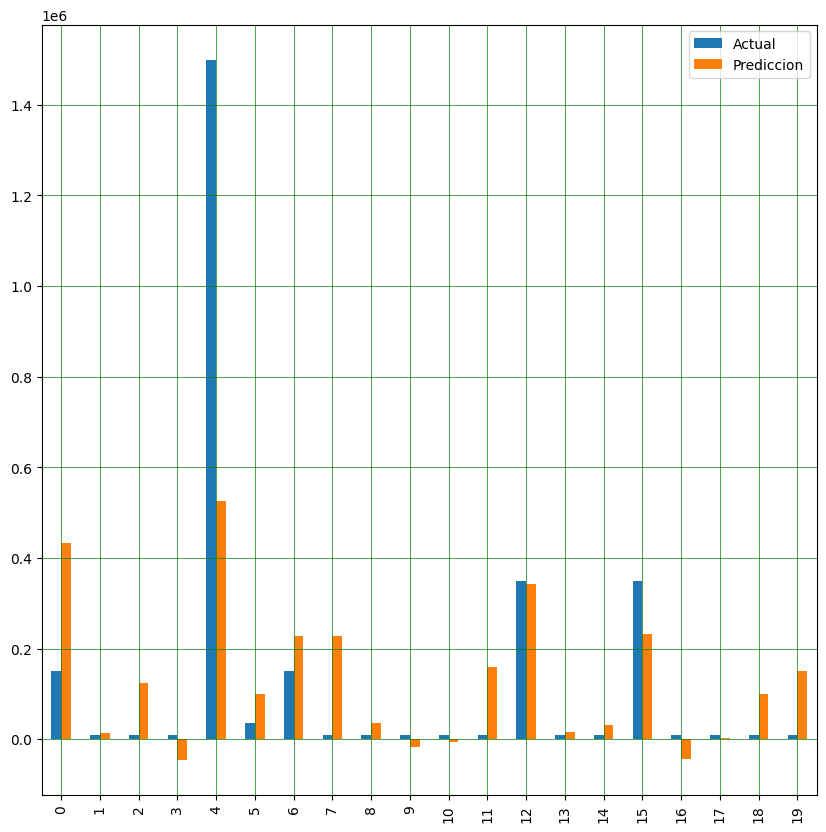

In [48]:
df1 = df1.loc[:, ['Actual', 'Prediccion']].head(25)  
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
